In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import xarray as xr # potentially useful
#import geopandas as gpd # might be useful for created US map graphs

#### Upload demand log data and refine out the random times

In [2]:
# dataframe for demand log
df_demand_log = pd.read_excel('FruitSoul Demand Log Fixed.xlsx')
df_demand_log['Earliest Delivery Date'] = df_demand_log['Earliest Delivery Date'].dt.date
df_demand_log['Preferred Delivery Date'] = df_demand_log['Preferred Delivery Date'].dt.date
df_demand_log['Latest Delivery Date'] = df_demand_log['Latest Delivery Date'].dt.date
df_demand_log_temp = df_demand_log.copy()
df_demand_log

,DemandID,Demand Request Date,Mix,Jar Size (vol. ounces),State,Quantity,Earliest Delivery Date,Preferred Delivery Date,Latest Delivery Date
0,1,2021-01-01,Apple-Mango,8,Maryland,1,2021-01-01,2021-01-04,2021-01-07
1,2,2021-01-01,Blueberry-Lemon,32,Kentucky,1,2021-01-04,2021-01-06,2021-01-09
2,3,2021-01-01,Orange-Passionfruit,16,Minnesota,1,2021-01-07,2021-01-10,2021-01-11
3,4,2021-01-01,Orange-Passionfruit,16,California,1,2021-01-07,2021-01-11,2021-01-14
4,5,2021-01-01,Orange-Passionfruit,32,Louisiana,1,2021-01-01,2021-01-04,2021-01-10
...,...,...,...,...,...,...,...,...,...
835374,835375,2023-12-31,Orange-Passionfruit,32,Arizona,1,2023-12-31,2024-01-05,2024-01-13
835375,835376,2023-12-31,Peach-Raspberry,32,California,1,2023-12-31,2024-01-01,2024-01-01
835376,835377,2023-12-31,Blueberry-Lemon,16,Arizona,1,2023-12-31,2024-01-02,2024-01-02
835377,835378,2023-12-31,Strawberry-Kiwi,8,California,1,2023-12-31,2024-01-03,2024-01-03


# Demand Request Date graphs

#### Total quantity by demand request date

<Axes: xlabel='Demand Request Date'>

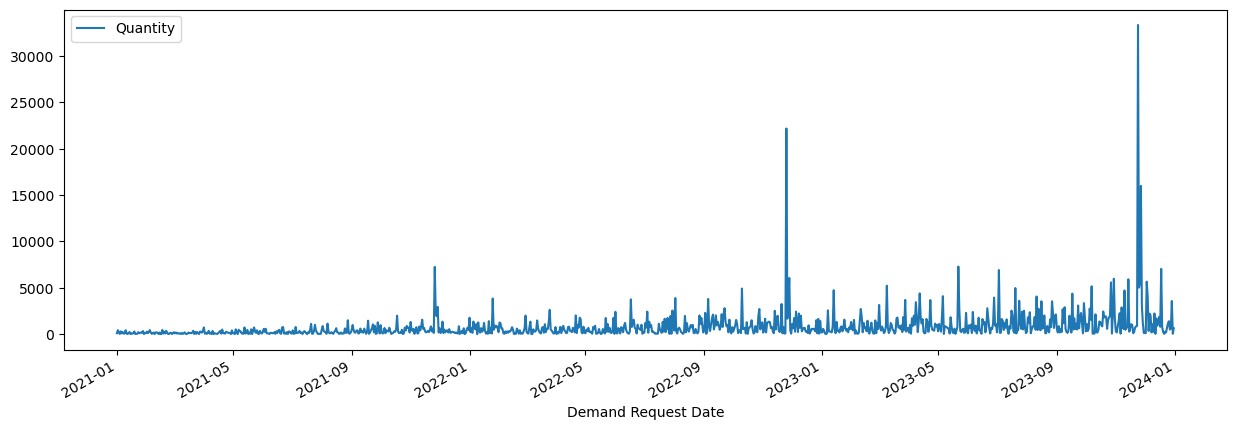

In [3]:
# Make a pivot table for over demand request date
pivot_demand_request_date = df_demand_log.pivot_table(index='Demand Request Date', 
                                        values='Quantity', aggfunc='sum', fill_value=0)

pivot_demand_request_date.plot(kind='line', figsize=(15, 5))

#### Daily demand request date for each mix and jar size (country aggregated)

In [4]:
# Make a pivot table for over demand request date
pivot_demand_request_date_by_mix = df_demand_log.pivot_table(index='Demand Request Date', 
                                        columns=['Mix', 'Jar Size  (vol. ounces)'], 
                                        values='Quantity', aggfunc='sum', fill_value=0)

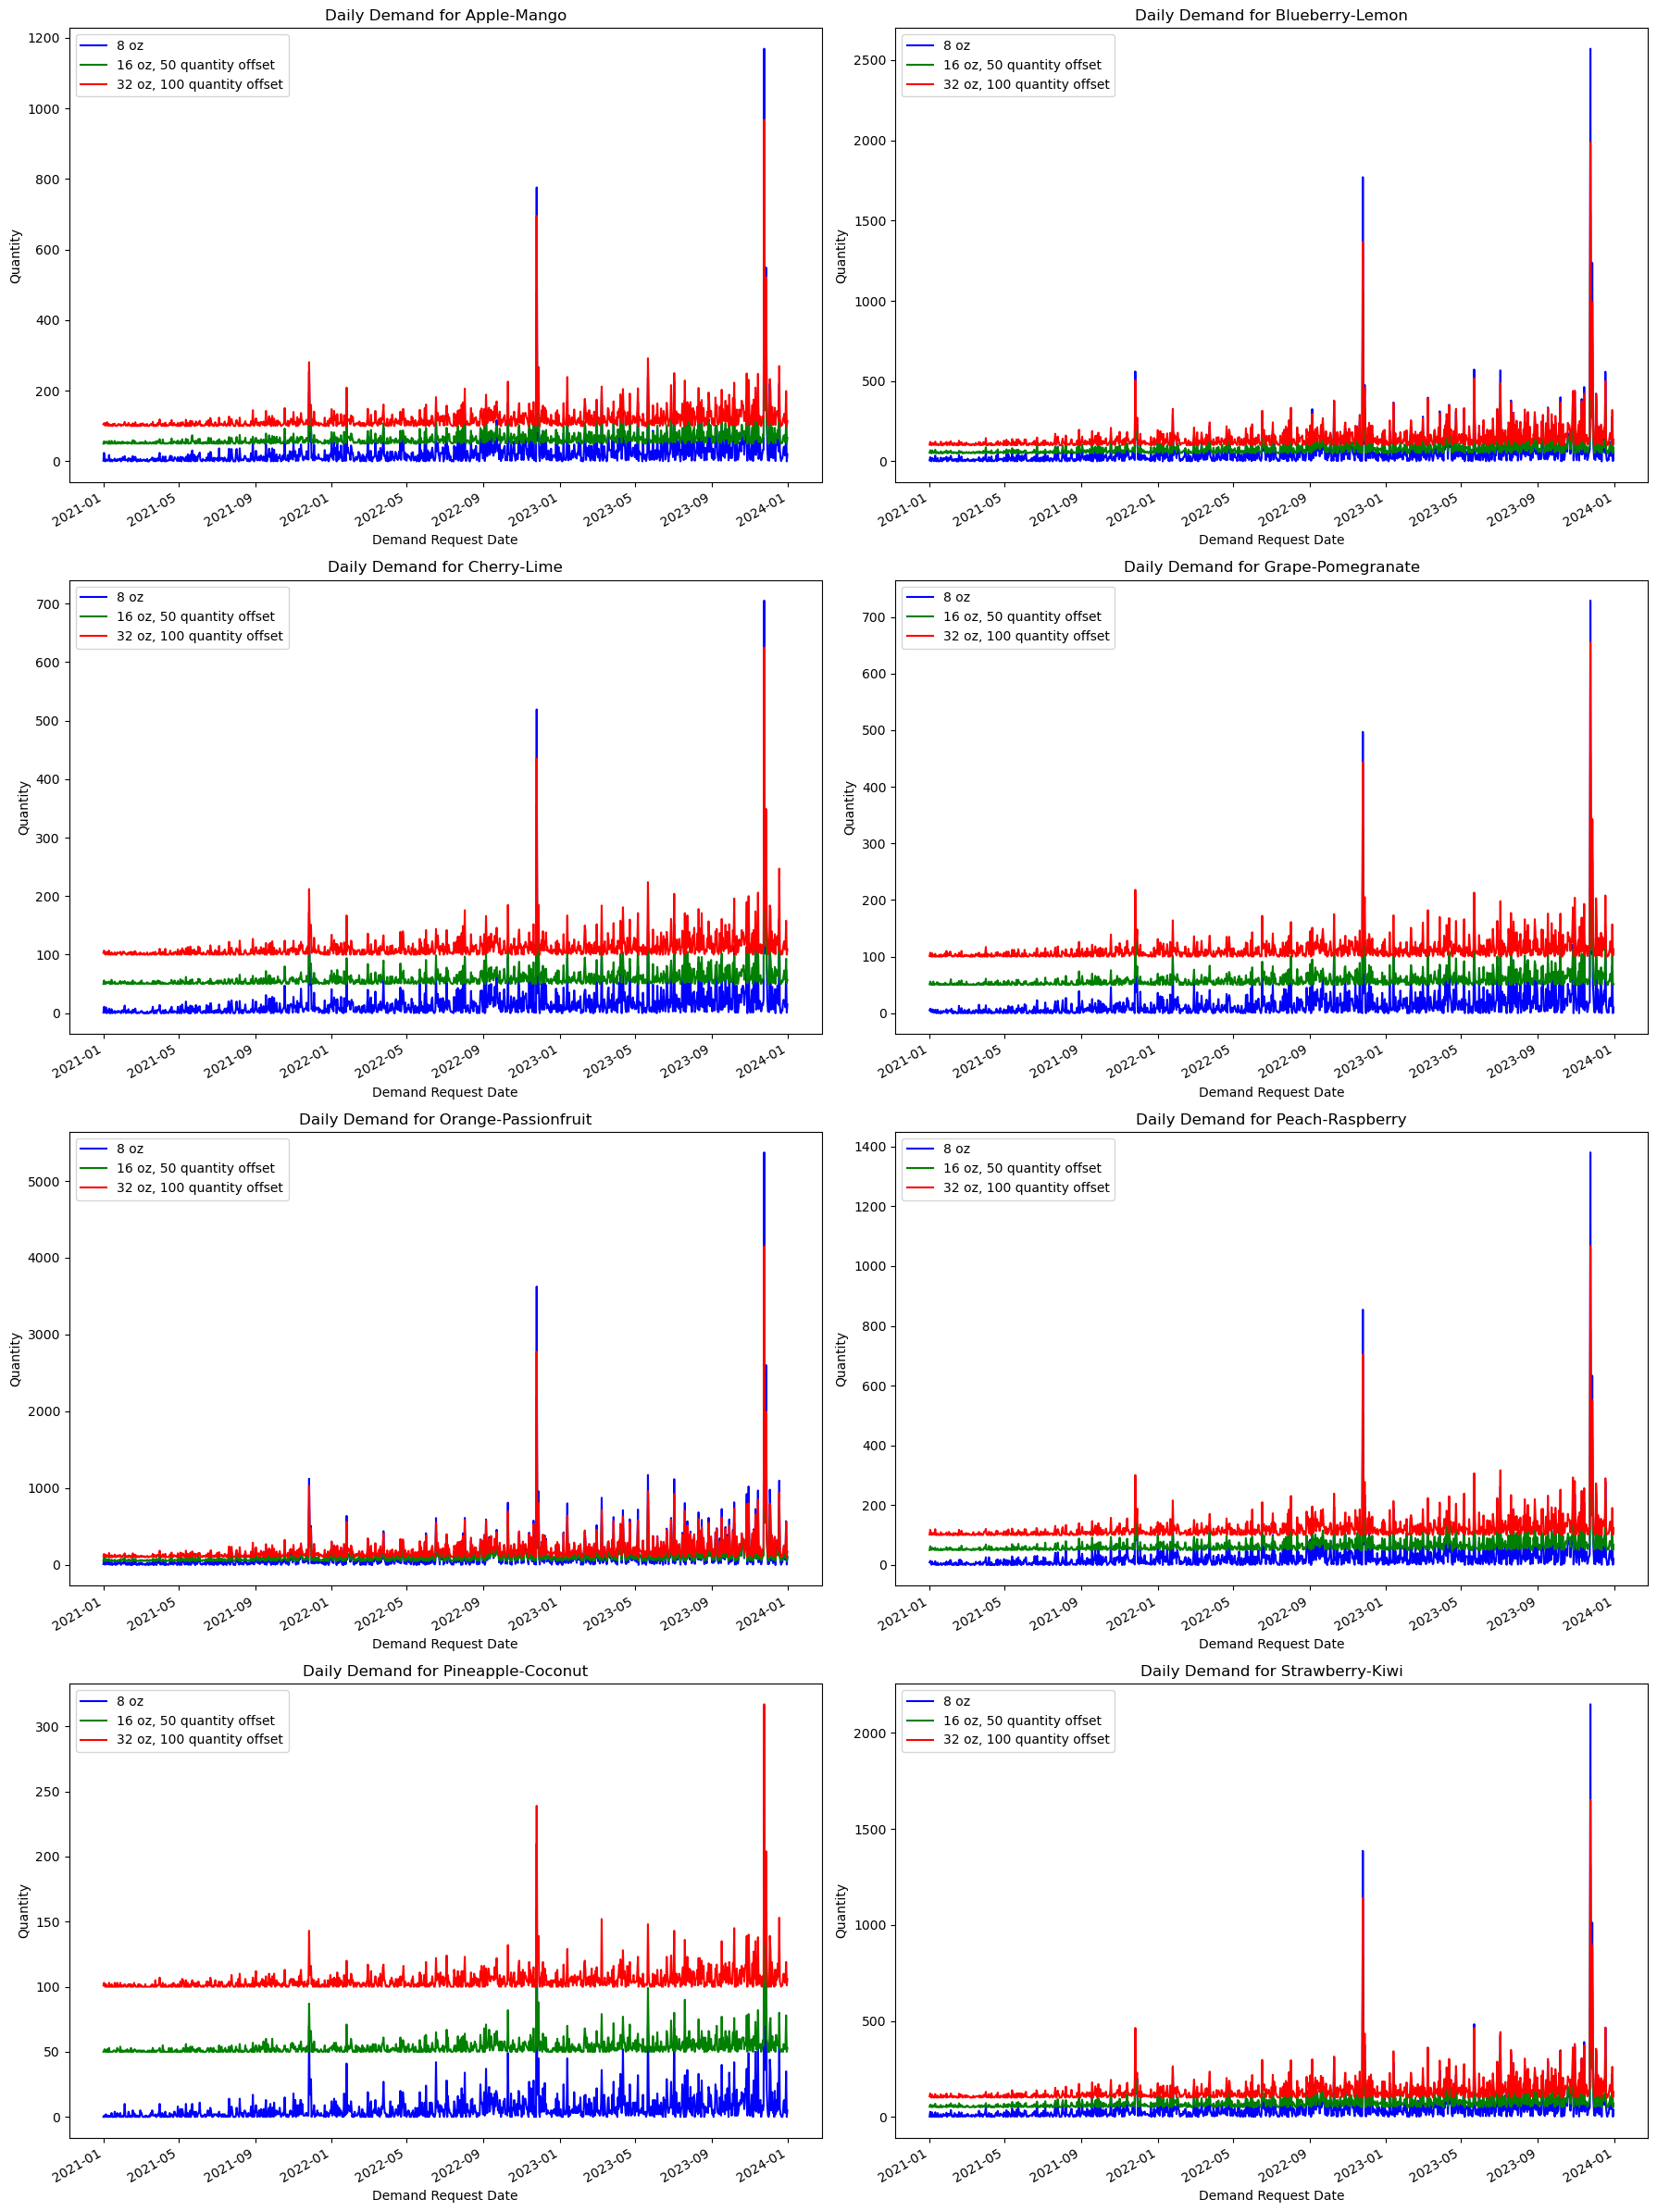

In [5]:
# Create the subplots with a 4x2 structure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define colors for each jar size
colors = ['blue', 'green', 'red']

i = 0
for n, mix in enumerate(pivot_demand_request_date_by_mix.columns.levels[0]):
    # Plot with vertical offsets and specified colors
    pivot_demand_request_date_by_mix[(mix, 8)].add(0).plot(ax=axes[i], label='8 oz', color=colors[0])
    pivot_demand_request_date_by_mix[(mix, 16)].add(50).plot(ax=axes[i], label='16 oz, 50 quantity offset', color=colors[1])
    pivot_demand_request_date_by_mix[(mix, 32)].add(100).plot(ax=axes[i], label='32 oz, 100 quantity offset', color=colors[2])

    # Add labels and title
    axes[i].set_xlabel('Demand Request Date')
    axes[i].set_ylabel('Quantity')
    axes[i].set_title(f'Daily Demand for {mix}')
    axes[i].legend()
    i += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### Quantity of mix and jar size by demand request date, on a weekly basis (for clarity)

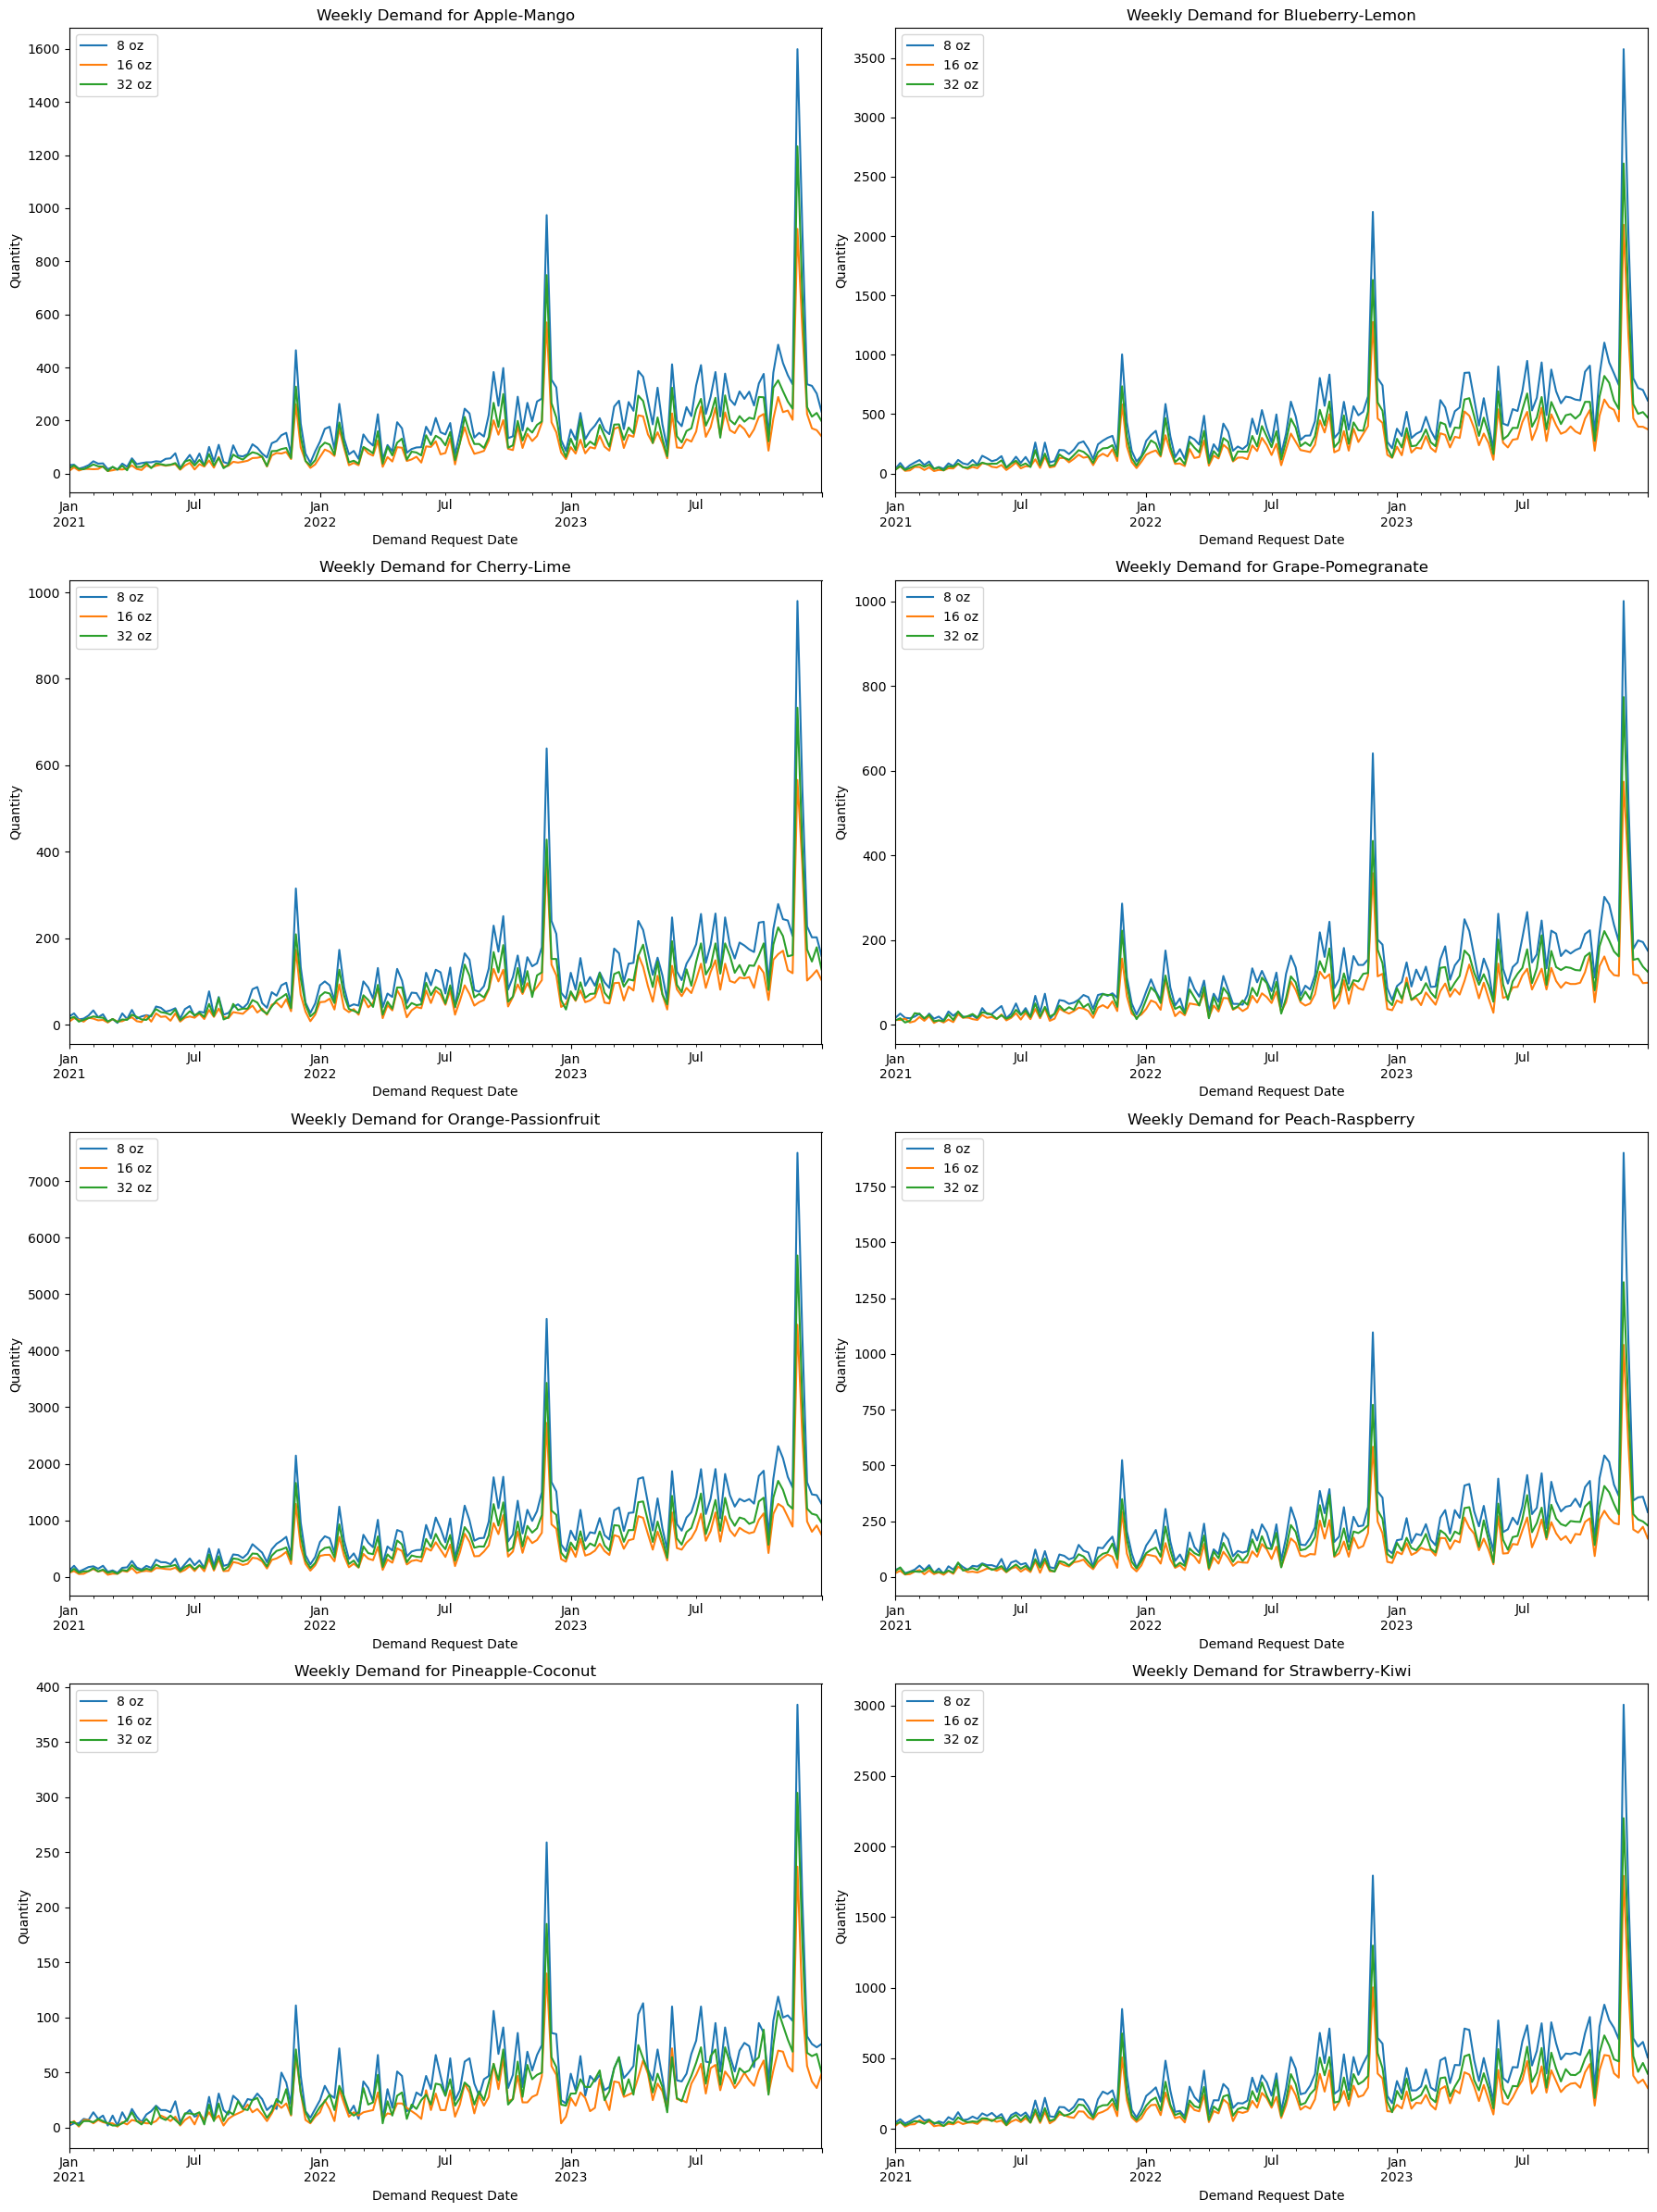

In [6]:
# Resample the pivot table to weekly
pivot_demand_request_date_by_mix_weekly = pivot_demand_request_date_by_mix.resample('W').sum()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

i = 0
for n, mix in enumerate(pivot_demand_request_date_by_mix_weekly.columns.levels[0]):
    # Plot
    pivot_demand_request_date_by_mix_weekly[(mix, 8)].plot(ax=axes[i], label='8 oz')
    pivot_demand_request_date_by_mix_weekly[(mix, 16)].plot(ax=axes[i], label='16 oz')
    pivot_demand_request_date_by_mix_weekly[(mix, 32)].plot(ax=axes[i], label='32 oz')

    # Add labels and title
    axes[i].set_xlabel('Demand Request Date')
    axes[i].set_ylabel('Quantity')
    axes[i].set_title(f'Weekly Demand for {mix}')
    axes[i].legend()
    i += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### Total Demand by states, ordered by total quantitiy from least to greatest

In [7]:
# Create a pivot table indexed by demand request date with all states
pivot_demand_request_date_states = df_demand_log.pivot_table(index='Demand Request Date', 
                                                             columns='State', 
                                                             values='Quantity', 
                                                             aggfunc='sum', 
                                                             fill_value=0)

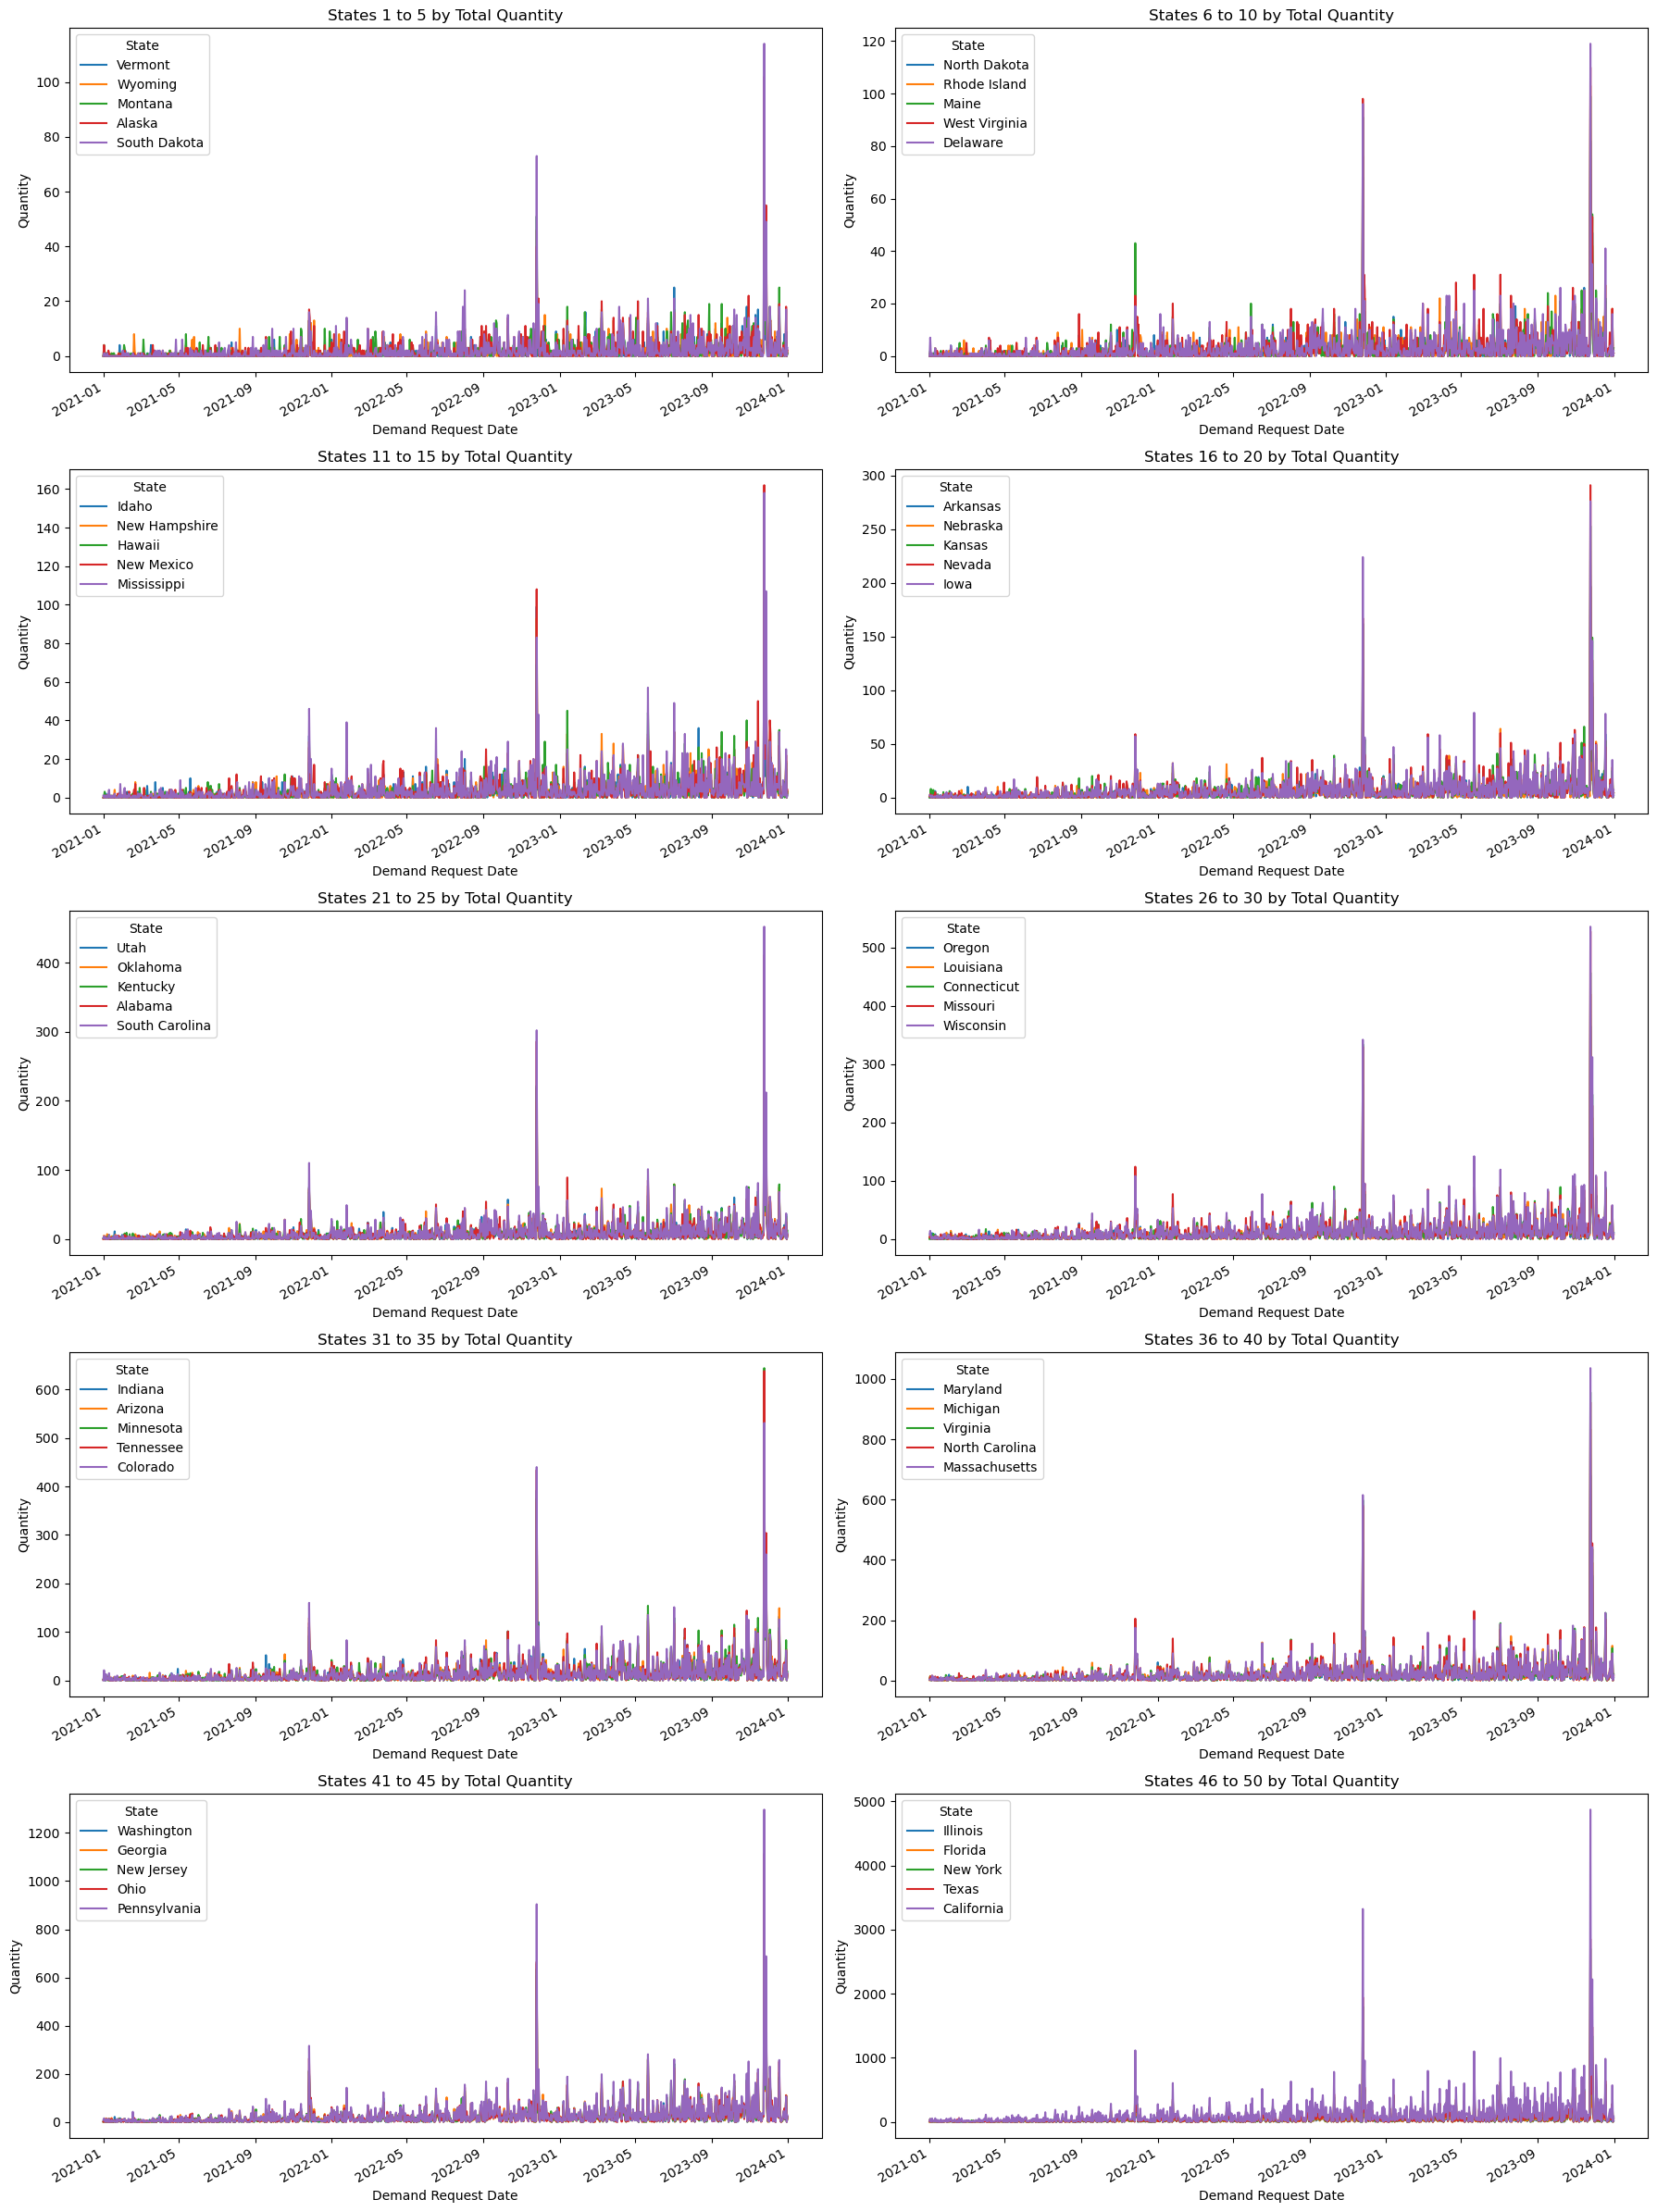

In [13]:
# Calculate the total quantity for each state
total_quantity_by_state = pivot_demand_request_date_states.sum()

# Sort the states by total quantity
sorted_states = total_quantity_by_state.sort_values()

# Split the sorted states into chunks of 5
state_chunks = [sorted_states[i:i + 5].index for i in range(0, len(sorted_states), 5)]

# Create the subplots with a 5x2 structure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each chunk of states
for i, chunk in enumerate(state_chunks):
    pivot_demand_request_date_states[chunk].plot(ax=axes[i])
    axes[i].set_title(f'States {i*5+1} to {i*5+5} by Total Quantity')
    axes[i].set_xlabel('Demand Request Date')
    axes[i].set_ylabel('Quantity')
    axes[i].legend(title='State')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### Average demand per day over states

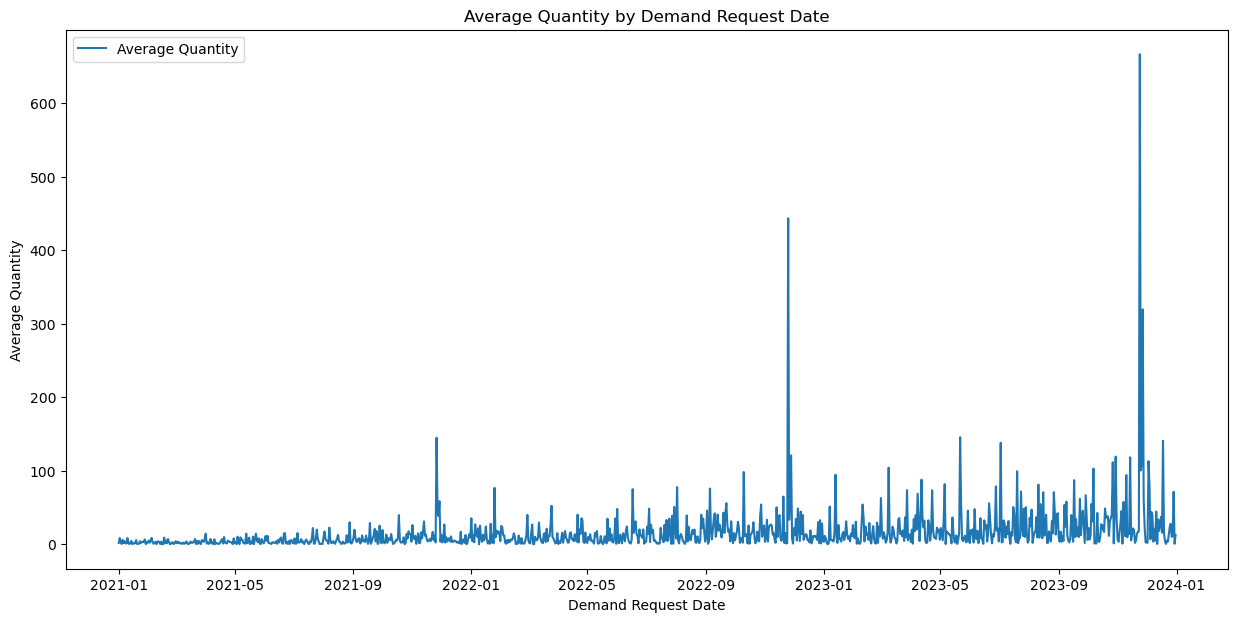

In [9]:


#pivot_demand_request_date_states
pivot_demand_request_date_states['Average'] = pivot_demand_request_date_states.mean(axis=1)

# Plot demand request date on the x-axis and average on the y-axis
plt.figure(figsize=(15, 7))
plt.plot(pivot_demand_request_date_states.index, pivot_demand_request_date_states['Average'], label='Average Quantity')
plt.xlabel('Demand Request Date')
plt.ylabel('Average Quantity')
plt.title('Average Quantity by Demand Request Date')
plt.legend()
plt.show()

#### Smoothing demand

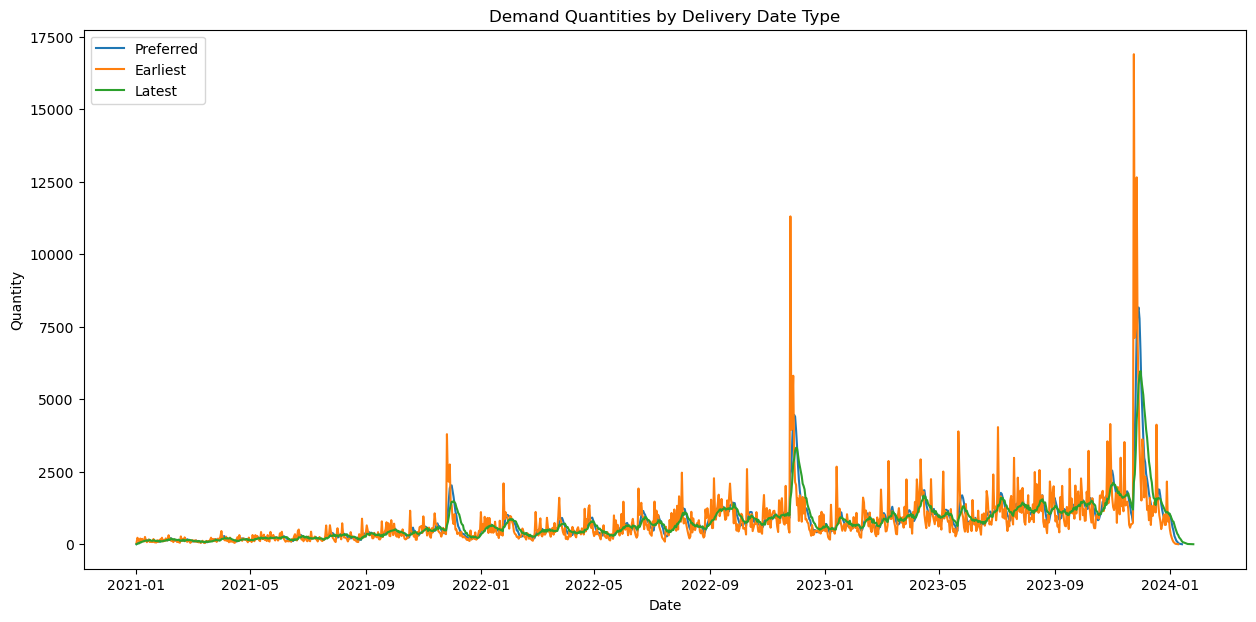

In [10]:
# Create a pivot table indexed by preferred delivery date
pivot_preferred_delivery_date = df_demand_log.pivot_table(index='Preferred Delivery Date', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

pivot_earliest_delivery_date = df_demand_log.pivot_table(index='Earliest Delivery Date', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

pivot_latest_delivery_date = df_demand_log.pivot_table(index='Latest Delivery Date', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)
# Plot all three pivot tables on the same graph
plt.figure(figsize=(15, 7))
plt.plot(pivot_preferred_delivery_date.index, pivot_preferred_delivery_date['Quantity'], label='Preferred')
plt.plot(pivot_earliest_delivery_date.index, pivot_earliest_delivery_date['Quantity'], label='Earliest')
plt.plot(pivot_latest_delivery_date.index, pivot_latest_delivery_date['Quantity'], label='Latest')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Demand Quantities by Delivery Date Type')
plt.legend()
plt.show()

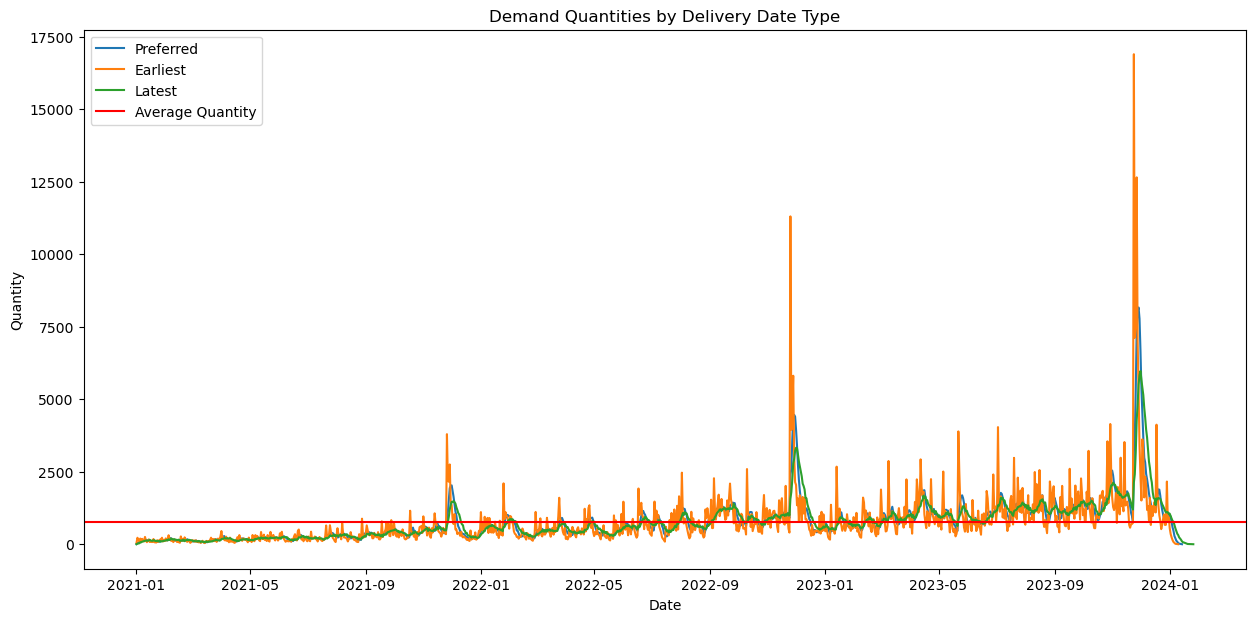

In [11]:
# Calculate the average quantity for the latest delivery date
average_quantity_latest = pivot_latest_delivery_date['Quantity'].mean()

# Plot all three pivot tables on the same graph
plt.figure(figsize=(15, 7))
plt.plot(pivot_preferred_delivery_date.index, pivot_preferred_delivery_date['Quantity'], label='Preferred')
plt.plot(pivot_earliest_delivery_date.index, pivot_earliest_delivery_date['Quantity'], label='Earliest')
plt.plot(pivot_latest_delivery_date.index, pivot_latest_delivery_date['Quantity'], label='Latest')

# Plot the average line for the latest delivery date
plt.axhline(y=average_quantity_latest, color='r', label='Average Quantity')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Demand Quantities by Delivery Date Type')
plt.legend()
plt.show()